In [1]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [2]:
ana_labels = {
    "Before" : [
        "SU2020a_CRY_onspill-LH_aw_bug",
        "SU2020a_signal_onspill-LH_aw_bug",
        "SU2020b_CRY_onspill-LH_aw_bug",
        "SU2020b_signal_onspill-LH_aw_bug",
        "SU2020c_CRY_onspill-LH_aw_bug",
        "SU2020c_signal_onspill-LH_aw_bug",
        "SU2020d_CRY_onspill-LH_aw_bug",
        "SU2020d_signal_onspill-LH_aw_bug",
        "SU2020e_CRY_onspill-LH_aw_bug",
        "SU2020e_signal_onspill-LH_aw_bug"
    ],
    
    "After" : [
        "SU2020a_CRY_onspill-LH_aw",
        "SU2020a_signal_onspill-LH_aw",
        "SU2020b_CRY_onspill-LH_aw",
        "SU2020b_signal_onspill-LH_aw",
        "SU2020c_CRY_onspill-LH_aw",
        "SU2020c_signal_onspill-LH_aw",
        "SU2020d_CRY_onspill-LH_aw",
        "SU2020d_signal_onspill-LH_aw",
        "SU2020e_CRY_onspill-LH_aw",
        "SU2020e_signal_onspill-LH_aw"
    ]
    
}

In [3]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/SU2020a_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020b_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020b_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020b_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020b_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_pat

In [4]:
plot = Plot() # just for style file

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [5]:
from pyutils.pylogger import Logger
logger = Logger()
# Efficiencies 
def get_eff(results):
    """
    Extract efficiency data from the nested results dictionary.
    Returns nested dictionaries with the same structure as results.
    """
    sig_eff_dict, veto_eff_dict = {}, {}
    # eff_dict = {}
    
    # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
    for key in results.keys():

        # eff_dict[key] = {}
        sig_eff_dict[key] = {}
        veto_eff_dict[key] = {}
        
        # Iterate through analysis labels for this key
        for ana_label in results[key].keys():

            print(key, ana_label)
            analysis = results[key][ana_label]["analysis"]

            print(50*"=")

            # display(analysis)
            
            try:
        
                if "signal" in ana_label:
                    print(f"Processing signal: {ana_label}")

                    try:
                    
                        sig_eff          = float(analysis.at[2, "CE-like (wide)"])
                        sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
                        sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
                        sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                        
                        sig_eff_dict[key][ana_label] = {
                            "sig_eff": sig_eff,
                            "sig_eff_err": sig_eff_err
                        }

                    except: 

                        try: 
                            sig_eff          = float(analysis.iloc[0, 3])
                            sig_eff_err_low  = abs(float(analysis.iloc[0, 4]))
                            sig_eff_err_hi   = float(analysis.iloc[0, 5])
                            sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                            
                            sig_eff_dict[key][ana_label] = {
                                "sig_eff": sig_eff,
                                "sig_eff_err": sig_eff_err
                            }

                        except Exception as e: 
                            logger.log(f"Failed: {e}", "error")
                        
                elif "CRY" in ana_label:     
                    print(f"Processing CRY: {ana_label}")

                    try: 
                        veto_eff         = float(analysis.at[2, "No veto (wide)"])
                        veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
                        veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
                        veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                
                        veto_eff_dict[key][ana_label] = {
                            "veto_eff": veto_eff,
                            "veto_eff_err": veto_eff_err
                        }

                    except: 
                        veto_eff         = float(analysis.iloc[3, 3])
                        veto_eff_err_low = abs(float(analysis.iloc[3, 4]))
                        veto_eff_err_hi  = float(analysis.iloc[3, 5])
                        veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                
                        veto_eff_dict[key][ana_label] = {
                            "veto_eff": veto_eff,
                            "veto_eff_err": veto_eff_err
                        }

                        
                logger.log("Success", "success")
                    
            except Exception as e:
                logger.log(f"Failed: {e}", "error")
                  
            print(50*"=")

            # break
    
    return sig_eff_dict, veto_eff_dict

sig_eff_dict, veto_eff_dict = get_eff(results)

Before SU2020a_CRY_onspill-LH_aw_bug
Processing CRY: SU2020a_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020a_signal_onspill-LH_aw_bug
Processing signal: SU2020a_signal_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020b_CRY_onspill-LH_aw_bug
Processing CRY: SU2020b_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020b_signal_onspill-LH_aw_bug
Processing signal: SU2020b_signal_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020c_CRY_onspill-LH_aw_bug
Processing CRY: SU2020c_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020c_signal_onspill-LH_aw_bug
Processing signal: SU2020c_signal_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020d_CRY_onspill-LH_aw_bug
Processing CRY: SU2020d_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020d_signal_onspill-LH_aw_bug
Processing signal: SU2020d_signal_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020e_CRY_onspill-LH_aw_bug
Processing CRY: SU2020e_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before SU2020e_signal_onspil

In [6]:
sig_eff_dict, veto_eff_dict

({'Before': {'SU2020a_signal_onspill-LH_aw_bug': {'sig_eff': 0.4046,
    'sig_eff_err': array([0.00316159, 0.00318639])},
   'SU2020b_signal_onspill-LH_aw_bug': {'sig_eff': 0.6728999999999999,
    'sig_eff_err': array([0.00407539, 0.00410005])},
   'SU2020c_signal_onspill-LH_aw_bug': {'sig_eff': 0.7424499999999999,
    'sig_eff_err': array([0.00427996, 0.00430459])},
   'SU2020d_signal_onspill-LH_aw_bug': {'sig_eff': 21.738625,
    'sig_eff_err': array([0.02061631, 0.02063044])},
   'SU2020e_signal_onspill-LH_aw_bug': {'sig_eff': 20.089299999999998,
    'sig_eff_err': array([0.02002593, 0.02004089])}},
  'After': {'SU2020a_signal_onspill-LH_aw': {'sig_eff': 16.59005,
    'sig_eff_err': array([0.01859121, 0.01860792])},
   'SU2020b_signal_onspill-LH_aw': {'sig_eff': 20.810200000000002,
    'sig_eff_err': array([0.02029021, 0.02030481])},
   'SU2020c_signal_onspill-LH_aw': {'sig_eff': 21.67635,
    'sig_eff_err': array([0.02059493, 0.02060909])},
   'SU2020d_signal_onspill-LH_aw': {'sig_

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../output/images/comp/bo_eff_comp_aw_before_after_abcde_1.png


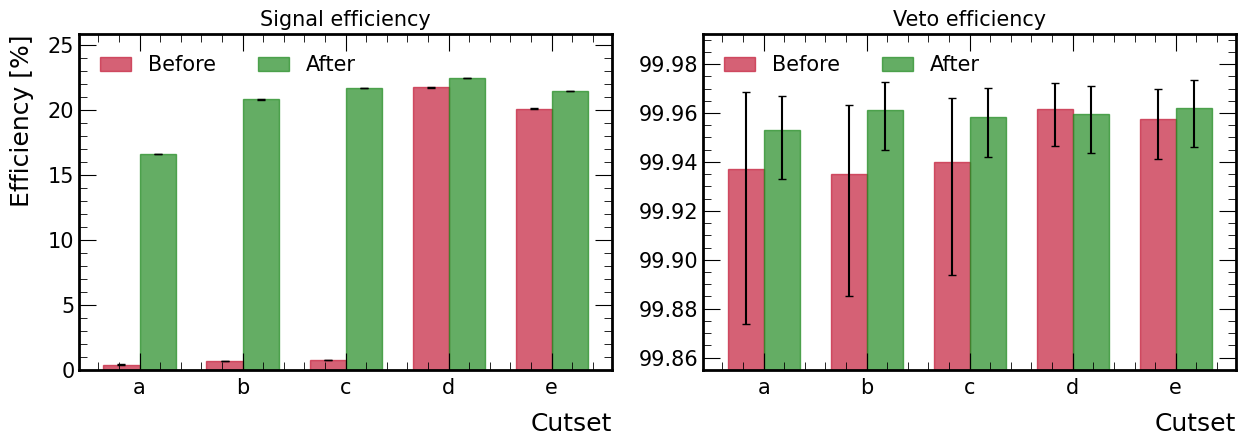

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

plotter = Plot()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency plot
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
# colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]

x = np.arange(len(cutsets))
width = 0.35

# Extract data for all cutsets
before_sig_effs = []
after_sig_effs = []
before_sig_errs = []
after_sig_errs = []

for cutset in cutsets:
    # Find matching keys for before and after
    before_key = None
    after_key = None
    
    for key in sig_eff_dict["Before"].keys():
        if cutset in key:
            before_key = key
            break
    
    for key in sig_eff_dict["After"].keys():
        if cutset in key:
            after_key = key
            break
    
    if before_key and after_key:
        before_sig_effs.append(sig_eff_dict["Before"][before_key]["sig_eff"])
        after_sig_effs.append(sig_eff_dict["After"][after_key]["sig_eff"])
        
        before_sig_errs.append([sig_eff_dict["Before"][before_key]["sig_eff_err"][0],
                               sig_eff_dict["Before"][before_key]["sig_eff_err"][1]])
        after_sig_errs.append([sig_eff_dict["After"][after_key]["sig_eff_err"][0],
                              sig_eff_dict["After"][after_key]["sig_eff_err"][1]])

before_sig_errs = np.array(before_sig_errs).T
after_sig_errs = np.array(after_sig_errs).T
# "#2E74B5", "#CC8400"228B22
# Plot side-by-side bars
ax1.bar(x - width/2, before_sig_effs, width, yerr=before_sig_errs, capsize=3,
        color='#C41E3A', alpha=0.7, edgecolor='#C41E3A', label='Before')
ax1.bar(x + width/2, after_sig_effs, width, yerr=after_sig_errs, capsize=3,
        color='#228B22', alpha=0.7, edgecolor='#228B22', label='After')

ax1.set_xticks(x)
ax1.set_xticklabels(cutset.replace("SU2020", "") for cutset in cutsets)
ax1.set_ylabel("Efficiency [%]")
ax1.set_title("Signal efficiency")
ax1.legend(loc="upper left", ncols=2)
ax1.set_ylim(0, max(max(before_sig_effs), max(after_sig_effs)) * 1.15)
ax1.set_xlabel("Cutset")

# Veto efficiency plot
before_veto_effs = []
after_veto_effs = []
before_veto_errs = []
after_veto_errs = []

for cutset in cutsets:
    # Find matching keys for before and after
    before_key = None
    after_key = None
    
    for key in veto_eff_dict["Before"].keys():
        if cutset in key:
            before_key = key
            break
    
    for key in veto_eff_dict["After"].keys():
        if cutset in key:
            after_key = key
            break
    
    if before_key and after_key:
        before_veto_effs.append(veto_eff_dict["Before"][before_key]["veto_eff"])
        after_veto_effs.append(veto_eff_dict["After"][after_key]["veto_eff"])
        
        before_veto_errs.append([veto_eff_dict["Before"][before_key]["veto_eff_err"][0],
                                veto_eff_dict["Before"][before_key]["veto_eff_err"][1]])
        after_veto_errs.append([veto_eff_dict["After"][after_key]["veto_eff_err"][0],
                               veto_eff_dict["After"][after_key]["veto_eff_err"][1]])

before_veto_errs = np.array(before_veto_errs).T
after_veto_errs = np.array(after_veto_errs).T

# Plot side-by-side bars
ax2.bar(x - width/2, before_veto_effs, width, yerr=before_veto_errs, capsize=3,
        color='#C41E3A', alpha=0.7, edgecolor='#C41E3A', label='Before')
ax2.bar(x + width/2, after_veto_effs, width, yerr=after_veto_errs, capsize=3,
        color='#228B22', alpha=0.7, edgecolor='#228B22', label='After')

ax2.set_xticks(x)
ax2.set_xticklabels([cutset.replace("SU2020", "") for cutset in cutsets])
# ax2.set_ylabel("Efficiency [%]")
ax2.set_xlabel("Cutset")
# ax2.set_ylabel("Efficiency [%]")
ax2.set_title("Veto efficiency")
ax2.legend(loc="upper left", ncols=2)

# Set y-axis limits for veto efficiency
veto_min = min(min(before_veto_effs), min(after_veto_effs))
veto_max = max(max(before_veto_effs), max(after_veto_effs))
ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_1.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2.png


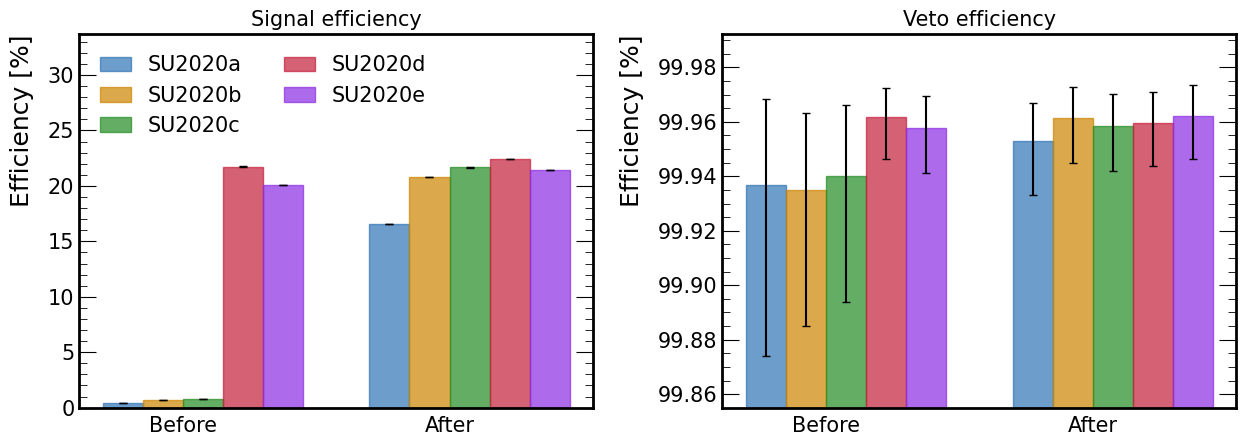

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

plotter = Plot()  # for style

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency plot
sig_labels = ["Before", "After"]
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]

x = np.arange(len(sig_labels))
width = 0.15

for i, cutset in enumerate(cutsets):
    # Extract efficiency values for Before and After
    sig_effs = []
    sig_errs_lower = []
    sig_errs_upper = []
    
    for period in sig_labels:
        # Find the key that contains this cutset
        matching_key = None
        for key in sig_eff_dict[period].keys():
            if cutset in key:
                matching_key = key
                break
        
        if matching_key:
            sig_effs.append(sig_eff_dict[period][matching_key]["sig_eff"])
            sig_errs_lower.append(sig_eff_dict[period][matching_key]["sig_eff_err"][0])
            sig_errs_upper.append(sig_eff_dict[period][matching_key]["sig_eff_err"][1])
    
    # Create error bars array
    sig_errs = np.array([sig_errs_lower, sig_errs_upper])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax1.bar(x + offset, sig_effs, width, yerr=sig_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], 
            label=cutset) # replace("SU2020", ""))

ax1.set_xticks(x)
ax1.set_xticklabels(sig_labels)
ax1.set_ylabel("Efficiency [%]")
ax1.set_title("Signal efficiency")
ax1.legend(ncols=2, loc="upper left")

plt.tight_layout()

# Set y-limits for signal efficiency
all_sig_effs = []
for period in sig_eff_dict.values():
    for data_point in period.values():
        all_sig_effs.append(data_point["sig_eff"])
ax1.set_ylim(0, max(all_sig_effs) * 1.5)
ax1.tick_params(axis='x', which='both', length=0)

# Veto efficiency plot
veto_labels = ["Before", "After"]  # Using the same structure as signal data

x = np.arange(len(veto_labels))

for i, cutset in enumerate(cutsets):
    # Extract efficiency values for Before and After
    veto_effs = []
    veto_errs_lower = []
    veto_errs_upper = []
    
    for period in veto_labels:
        # Find the key that contains this cutset
        matching_key = None
        for key in veto_eff_dict[period].keys():
            if cutset in key:
                matching_key = key
                break
        
        if matching_key:
            veto_effs.append(veto_eff_dict[period][matching_key]["veto_eff"])
            veto_errs_lower.append(veto_eff_dict[period][matching_key]["veto_eff_err"][0])
            veto_errs_upper.append(veto_eff_dict[period][matching_key]["veto_eff_err"][1])
    
    # Create error bars array
    veto_errs = np.array([veto_errs_lower, veto_errs_upper])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax2.bar(x + offset, veto_effs, width, yerr=veto_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], 
            label=cutset) # replace("SU2020", ""))

ax2.set_xticks(x)
ax2.set_xticklabels(veto_labels)
ax2.set_ylabel("Efficiency [%]")
ax2.set_title("Veto efficiency")
# ax2.legend()  # Uncomment if you want legend on both plots

# Set y-axis limits for veto efficiency (they're typically very high, around 99.9%)
all_veto_effs = []
for period in veto_eff_dict.values():
    for data_point in period.values():
        all_veto_effs.append(data_point["veto_eff"])

veto_min = min(all_veto_effs)
veto_max = max(all_veto_effs)
ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)
ax2.tick_params(axis='x', which='both', length=0)

plt.tight_layout()

out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [9]:
# def get_optimal_cutset(sig_eff_dict, veto_eff_dict, veto_threshold=99.9, include_errors=True, out_path = None):
#     """
#     Find the cutset that maximises signal efficiency while maintaining veto efficiency above threshold
    
#     Args:
#         veto_threshold: minimum acceptable veto efficiency (default 99.9%)
#         include_errors: if True, check if veto_eff - error > threshold
#     """

#     report_str = "=== ANALYSIS ===\n"

#     logger.log(f"Maximising signal efficiency with veto efficiency >= {veto_threshold}%\n", "info")
    
#     valid_cutsets = {}
#     invalid_cutsets = {}
    
#     for cutset in ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]:

#         report_str += f"\n--- {cutset} ---\n"
        
#         # Signal efficiency stats
#         sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
#         avg_sig_eff = np.mean(sig_effs)
#         sig_std = np.std(sig_effs)
        
#         # Veto efficiency stats  
#         veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
#         avg_veto_eff = np.mean(veto_effs)
#         veto_std = np.std(veto_effs)
        
#         # Check if veto efficiency meets threshold
#         if include_errors:
#             # Fairly loose: require veto_eff + 1sigma error > threshold
#             min_veto_errors = [data["veto_eff"] - data["veto_eff_err"][0] 
#                               for data in veto_eff_dict[cutset].values()]
#             min_veto_with_error = min(min_veto_errors)
#             veto_passes = min_veto_with_error > veto_threshold
#             check_value = min_veto_with_error
#         else:
#             # Just check average
#             veto_passes = avg_veto_eff > veto_threshold  
#             check_value = avg_veto_eff
        
#         status = "GOOD" if veto_passes else "WARNING"

#         report_str += f"Status: {status}\n"
#         report_str += f"  Signal efficiency: {avg_sig_eff:.3f}% ± {sig_std:.3f}\n"
#         report_str += f"  Veto efficiency:   {avg_veto_eff:.5f}% ± {veto_std:.5f}\n"
#         report_str += f"  Veto check value:  {check_value:.5f}% (threshold: {veto_threshold}%)\n"
        
#         cutset_data = {
#             "avg_sig_eff": avg_sig_eff,
#             "sig_std": sig_std,
#             "avg_veto_eff": avg_veto_eff,
#             "veto_std": veto_std,
#             "veto_check_value": check_value,
#             "veto_passes": veto_passes
#         }
        
#         if veto_passes:
#             valid_cutsets[cutset] = cutset_data
#         else:
#             invalid_cutsets[cutset] = cutset_data
    
#     report_str += "\n=== RESULTS ===\n\n"
    
#     if not valid_cutsets:
#         report_str += "No cutsets meet the veto efficiency threshold!\n"
#         # Show best veto performer as fallback
#         best_veto = max(invalid_cutsets.items(), key=lambda x: x[1]["avg_veto_eff"])
#         report_str += f"Best veto performance: {best_veto[0]} ({best_veto[1]["avg_veto_eff"]:.5f}%)\n"
#         return report_str
    
#     # Find best signal efficiency among valid cutsets
#     best_cutset = max(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"])
    
#     # Show ranking of valid cutsets
#     ranked_valid = sorted(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"], reverse=True)
#     for i, (cutset, data) in enumerate(ranked_valid, 1):
#         margin = data["veto_check_value"] - veto_threshold
#         report_str += f"{i}. {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto +{margin:.5f}% margin\n"

#     report_str += f"\nOPTIMAL CUTSET: {best_cutset[0]}:\n\n"
#     report_str += f"   Signal efficiency: {best_cutset[1]["avg_sig_eff"]:.3f}% ± {best_cutset[1]["sig_std"]:.3f}\n"
#     report_str += f"   Veto efficiency:   {best_cutset[1]["avg_veto_eff"]:.5f}% ± {best_cutset[1]["veto_std"]:.5f}\n"
#     report_str += f"   Veto margin above threshold: +{best_cutset[1]["veto_check_value"] - veto_threshold:.5f}%\n"

    
#     if invalid_cutsets:
#         report_str += f"\n=== CUTSETS BELOW VETO THRESHOLD ===\n"
#         for cutset, data in invalid_cutsets.items():
#             deficit = veto_threshold - data["veto_check_value"]
#             report_str += f"   {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto -{deficit:.5f}% below threshold\n"

#     print(report_str)
    
#     if out_path is not None:
#         with open(out_path, "w") as f:
#             f.write(report_str)
#         logger.log(f"Wrote {out_path}", "success")

# get_optimal_cutset(sig_eff_dict["After"], veto_eff_dict["After"], out_path="../../output/misc/optimal_cutset_SU2020_aw.txt")

In [10]:
sig_eff_dict["After"]

{'SU2020a_signal_onspill-LH_aw': {'sig_eff': 16.59005,
  'sig_eff_err': array([0.01859121, 0.01860792])},
 'SU2020b_signal_onspill-LH_aw': {'sig_eff': 20.810200000000002,
  'sig_eff_err': array([0.02029021, 0.02030481])},
 'SU2020c_signal_onspill-LH_aw': {'sig_eff': 21.67635,
  'sig_eff_err': array([0.02059493, 0.02060909])},
 'SU2020d_signal_onspill-LH_aw': {'sig_eff': 22.449250000000003,
  'sig_eff_err': array([0.02085549, 0.02086927])},
 'SU2020e_signal_onspill-LH_aw': {'sig_eff': 21.438025,
  'sig_eff_err': array([0.02051244, 0.02052672])}}

In [11]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pyutils.pyplot import Plot
# plotter = Plot() # literally just do this for the style file, super laxy

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# # Signal efficiency - plot all cutsets (a, b, c, d)
# sig_labels = ["Before", "After"]  # Only au and aw have signal data
# cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
# colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]  # Different colors for each cutset

# x = np.arange(len(sig_labels))
# width = 0.15  # Narrower bars to fit 4 cutsets

# for i, cutset in enumerate(cutsets):
#     sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
#     sig_errs = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict[cutset].values()],
#                         [data["sig_eff_err"][1] for data in sig_eff_dict[cutset].values()]])
    
#     offset = (i - 2.0) * width  # Center the 4 bars around each x position
#     ax1.bar(x + offset, sig_effs, width, yerr=sig_errs, capsize=3, 
#             color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # #, 
#             # label=cutset.replace("SU2020", ""))

# ax1.set_xticks(x)
# ax1.set_xticklabels(sig_labels)
# ax1.set_ylabel("Efficiency [%]")
# ax1.set_title("Signal efficiency")
# ax1.legend(ncols=2, loc="upper left")
# ax1.set_ylim(0, max([max([data["sig_eff"] for data in sig_eff_dict[cutset].values()]) 
#                     for cutset in cutsets]) * 1.5)
# ax1.tick_params(axis='x', which='both', length=0)

# # Veto efficiency - plot all cutsets (a, b, c, d)
# veto_labels = ["MDC2020au", "MDC2020aw", "MDC2020as"]  # All three have veto data

# x = np.arange(len(veto_labels))
# width = 0.15  # Narrower bars to fit 4 cutsets

# for i, cutset in enumerate(cutsets):
#     veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
#     veto_errs = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict[cutset].values()],
#                          [data["veto_eff_err"][1] for data in veto_eff_dict[cutset].values()]])
    
#     offset = (i - 2.0) * width  # Center the 4 bars around each x position
#     ax2.bar(x + offset, veto_effs, width, yerr=veto_errs, capsize=3, 
#             color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # .replace("SU2020", ""))

# ax2.set_xticks(x)
# ax2.set_xticklabels(veto_labels)
# # ax2.set_ylabel("Efficiency [%]")
# ax2.set_title("Veto efficiency")
# # ax2.legend()

# # Set y-axis limits for veto efficiency (they"re typically very high, around 99.9%)
# veto_min = min([min([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
#                for cutset in cutsets])
# veto_max = max([max([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
#                for cutset in cutsets])
# ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)
# ax2.tick_params(axis='x', which='both', length=0)

# plt.tight_layout()

# out_path = "../../output/images/comp/bo_eff_comp_all_cutsets.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()